In [1]:
#-----------------------------------------------------------------------------------------------------------
#-------------------------------------scDRS分析(python)-----------------------------------------------------
#------------------------------------Pseudotime analysis----------------------------------------------------
#-----------------------------------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from matplotlib import rcParams
import scanpy as sc
sc.settings.verbosity = 3 
sc.logging.print_versions()
import os 
os.getcwd()


-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.3.0
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
cffi                        1.15.1
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.7.0
hypergeom_ufunc             NA
igraph                      0.10.4
ipykernel                   6.15.2
ipython_genutils            0.2.0
jedi                        0.18.1
joblib                      1.2.0
jupyter_server              1.18.1
kiwisolver                  1.4.4
leidenalg                   0.9.1
llvmlite                    0.39.1
matplotlib                  3.6.2
mpl_toolkits                NA
natsort      

'E:\\anaconda\\jupyter notebook\\sc'

In [2]:
results_file = 'pseudotime.h5ad'
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white') 

In [34]:
data = sc.read_h5ad("E:/anaconda/jupyter notebook/bd_brain.h5ad")

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:05)


E:\anaconda\anaconda-2022.10\envs\wenming\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


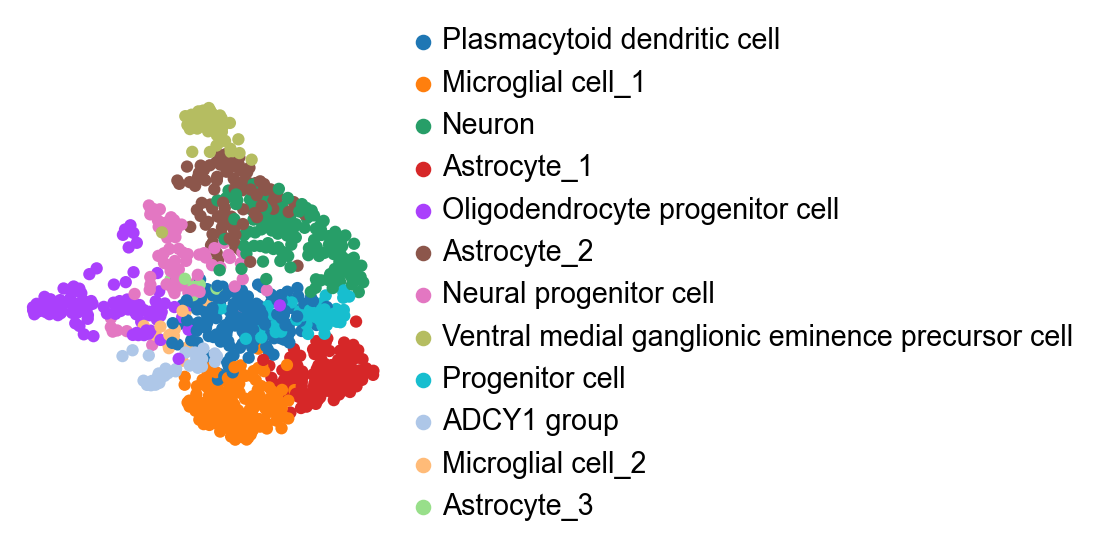

In [35]:
sc.tl.draw_graph(data)
sc.pl.draw_graph(data, color='leiden', legend_loc='right margin',title = "")

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.94876766 0.9137331  0.8936288  0.8859555  0.8725794
     0.85834295 0.83383054 0.8291827  0.8210824  0.8056547  0.79847753
     0.789953   0.7822914  0.7594581 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:05)


E:\anaconda\anaconda-2022.10\envs\wenming\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


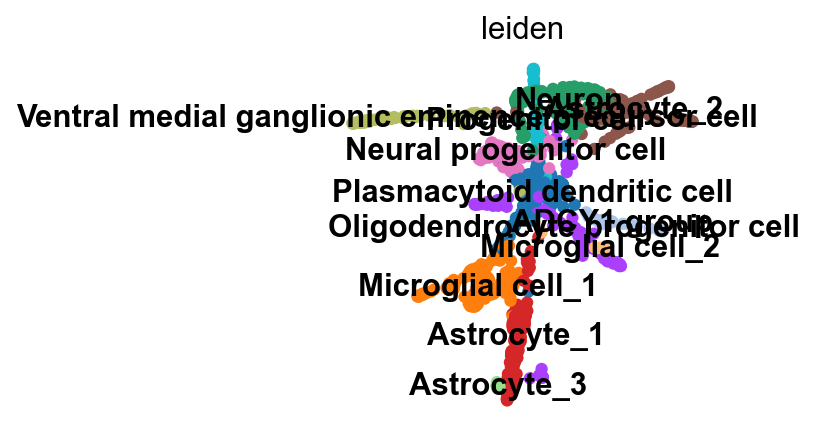

In [36]:
sc.tl.diffmap(data)
sc.pp.neighbors(data, n_neighbors=10, use_rep='X_diffmap')
sc.tl.draw_graph(data)
sc.pl.draw_graph(data, color='leiden', legend_loc='on data')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


<Axes: >

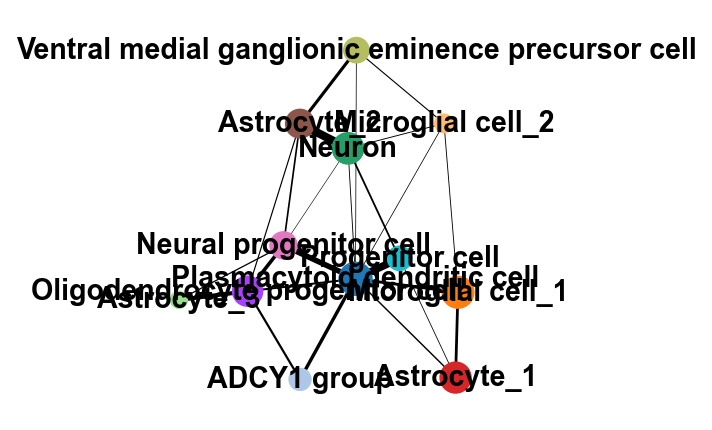

In [49]:
import igraph
sc.tl.paga(data, groups='leiden')
sc.pl.paga(data, threshold=0.03, show=False)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:04)


E:\anaconda\anaconda-2022.10\envs\wenming\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


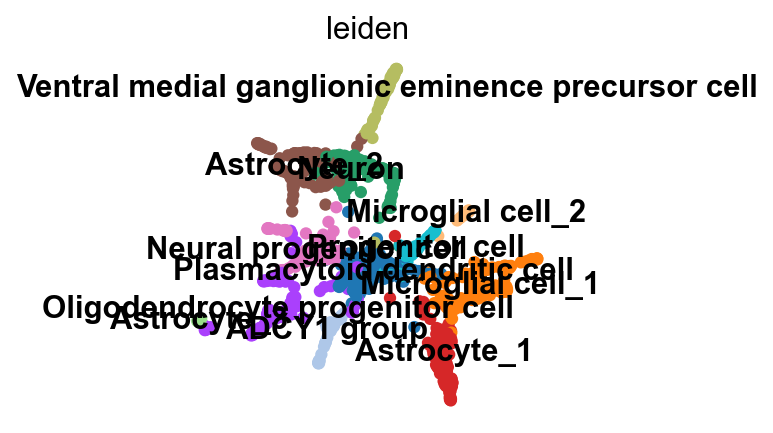

In [38]:
sc.tl.draw_graph(data, init_pos='paga')
sc.pl.draw_graph(data, color=['leiden'], legend_loc='on data')

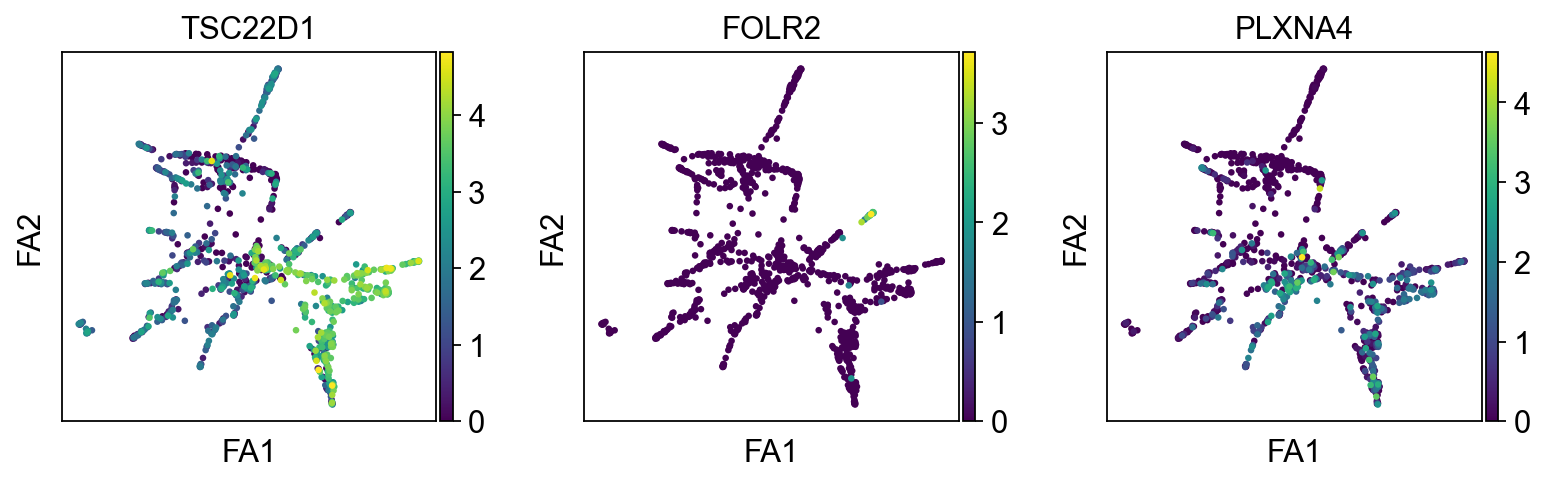

In [11]:
sc.pl.draw_graph(data, color=['TSC22D1','FOLR2','PLXNA4'],  frameon=True,legend_loc='on data',size=35)

In [ ]:
sc.pl.draw_graph(data, color=['TUBB2A','CKB','PDGFRB'],  frameon=True,legend_loc='on data',size=35)

In [ ]:
sc.pl.draw_graph(data, color=['RFTN2'],  frameon=True,legend_loc='on data',size=35)

In [ ]:
sc.pl.draw_graph(data, color=['DLX6-AS1'],  frameon=True,legend_loc='on data')

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


E:\anaconda\anaconda-2022.10\envs\wenming\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


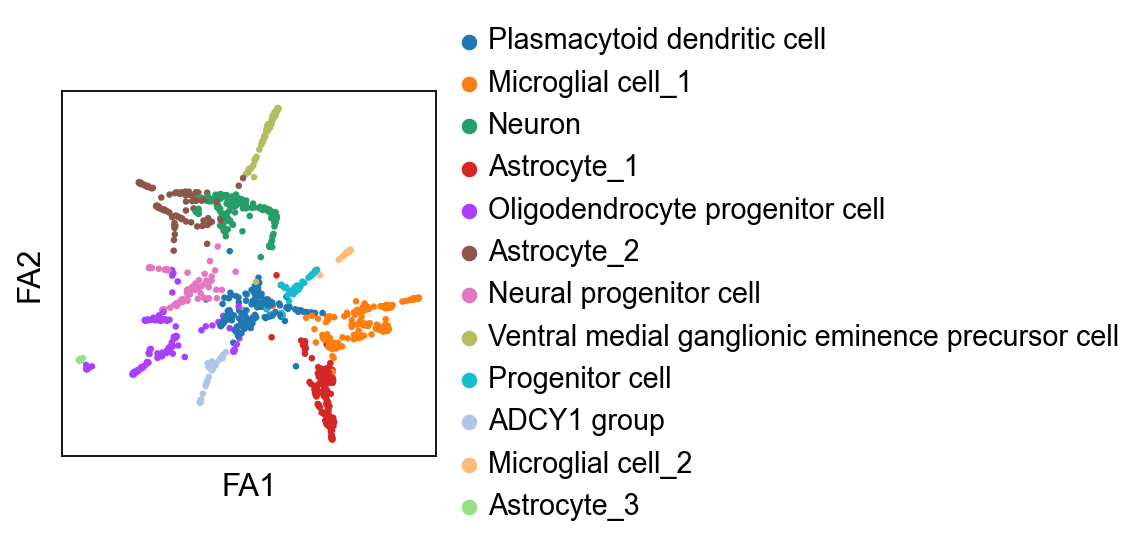

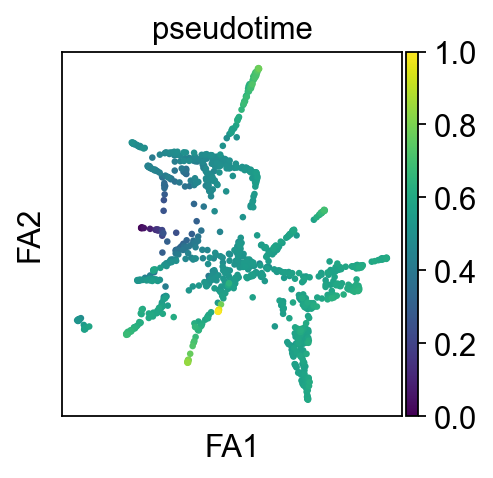

In [39]:
data.uns['iroot'] = np.flatnonzero(data.obs['leiden']  == 'Neural progenitor cell')[0]
sc.tl.dpt(data)
sc.pl.draw_graph(data, color=['leiden'], legend_loc='right margin',title = [''], frameon=True,size=35)
sc.pl.draw_graph(data, color=['dpt_pseudotime'], legend_loc='on data',title = ['pseudotime'], frameon=True,size=35)

In [13]:
#sc.tl.leiden(data, resolution=1.0)

running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [ ]:
#conda install -c conda-forge leidenalg
#conda update -n base -c conda-forge conda

In [45]:
gene_names = ['TUBB2A','CKB','PDGFRB','TSC22D1','FOLR2','PLXNA4','RFTN2']

In [67]:
paths = [('Astrocyte_1', ['Neural progenitor cell', 'Plasmacytoid dendritic cell','Microglial cell_1', 'Astrocyte_1']),
         ('Astrocyte_2', ['Neural progenitor cell', 'Astrocyte_2']),
         ('Astrocyte_3', ['Neural progenitor cell', 'Astrocyte_3']),
         ('Microglial cell_1', ['Neural progenitor cell', 'Plasmacytoid dendritic cell','Microglial cell_1']),
         ('Microglial cell_2', ['Neural progenitor cell', 'Plasmacytoid dendritic cell', 'Microglial cell_2']),
         ('Microglial cell_3', ['Neural progenitor cell','Plasmacytoid dendritic cell']),
         ('Oligodendrocyte \r\n progenitor cell', ['Neural progenitor cell', 'Oligodendrocyte progenitor cell'])
        
        ]

In [40]:
data.obs['distance'] = data.obs['dpt_pseudotime']

In [41]:
data.obs['clusters'] = data.obs['leiden']  # just a cosmetic change

In [42]:
data.uns['clusters_colors'] = data.uns['leiden_colors']

In [43]:
!mkdir write

子目录或文件 write 已经存在。


E:\anaconda\anaconda-2022.10\envs\wenming\lib\site-packages\scanpy\plotting\_tools\paga.py:1229: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
E:\anaconda\anaconda-2022.10\envs\wenming\lib\site-packages\scanpy\plotting\_tools\paga.py:1276: UserWarning: FixedFormatter should only be used together with FixedLocator
  anno_axis.set_yticklabels(['', anno, ''], fontsize=ytick_fontsize)
) missing from current font.l\Temp\ipykernel_36044\1358267046.py:22: UserWarning: Glyph 13 (
  pl.savefig('./figures/paga_path_paul15.pdf')
) missing from current font.l\Temp\ipykernel_36044\1358267046.py:22: UserWarning: Glyph 13 (
  pl.savefig('./figures/paga_path_paul15.pdf')
) missing from current font.\envs\wenming\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


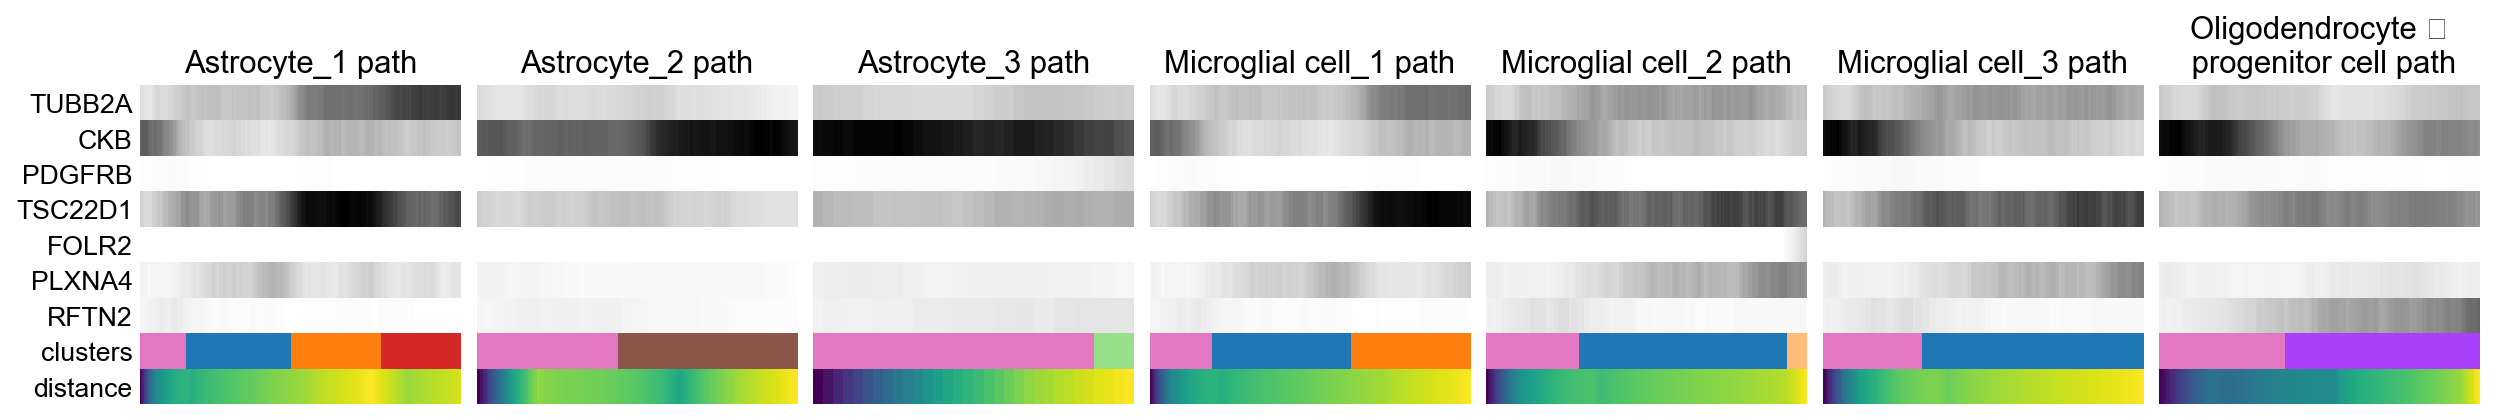

In [72]:
import matplotlib.pyplot as pl

_, axs = pl.subplots(ncols=7, figsize=(17, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data1 = sc.pl.paga_path(
        data, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
pl.savefig('./figures/paga_path_paul15.pdf')
pl.show()

In [30]:
data

AnnData object with n_obs × n_vars = 978 × 7026
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'tissue', 'BD_ATAC', 'BD_RNASeq', 'BD_TWAS', 'dpt_pseudotime', 'distance', 'clusters'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'SCDRS_PARAM', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'draw_graph', 'paga', 'leiden_sizes', 'diffmap_evals', 'iroot', 'clusters_colors'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [32]:
data.obs['leiden']

X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A10_CGAGGCTG.GCGTAAGA_L005_R1_001_trimmed.fq.gz.hs2.bam       1
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A12_GTAGAGGA.GCGTAAGA_L005_R1_001_trimmed.fq.gz.hs2.bam       1
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A1_TAAGGCGA.GCGTAAGA_L005_R1_merged_trimmed.fq.gz.hs2.bam     8
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A2_CGTACTAG.GCGTAAGA_L005_R1_001_trimmed.fq.gz.hs2.bam        8
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A3_AGGCAGAA.GCGTAAGA_L005_R1_001_trimmed.fq.gz.hs2.bam       13
                                                                                                                         ..
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.PEC_Yale_SingleCellRNAseq_HSB325_72_H3_trimmed.fq.gz.hs2.bam         3
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.PEC_Yale_SingleCellRNAseq_HSB325_72_H4_trimmed.fq.gz.hs2.bam         3
X.data.s

In [31]:
data.obs['clusters']

X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A10_CGAGGCTG.GCGTAAGA_L005_R1_001_trimmed.fq.gz.hs2.bam       1
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A12_GTAGAGGA.GCGTAAGA_L005_R1_001_trimmed.fq.gz.hs2.bam       1
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A1_TAAGGCGA.GCGTAAGA_L005_R1_merged_trimmed.fq.gz.hs2.bam     8
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A2_CGTACTAG.GCGTAAGA_L005_R1_001_trimmed.fq.gz.hs2.bam        8
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.C1.133.A3_AGGCAGAA.GCGTAAGA_L005_R1_001_trimmed.fq.gz.hs2.bam       13
                                                                                                                         ..
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.PEC_Yale_SingleCellRNAseq_HSB325_72_H3_trimmed.fq.gz.hs2.bam         3
X.data.sqcheng.boluncheng.Proj_scDRSbam.03_align_all.PEC_Yale_SingleCellRNAseq_HSB325_72_H4_trimmed.fq.gz.hs2.bam         3
X.data.s

In [ ]:
sc.pl.draw_graph(data, color=['leiden', 'dpt_pseudotime'], legend_loc='on data')

In [ ]:
sc.tl.paga(data, groups='leiden')

In [ ]:
sc.pl.paga(data, color=['leiden'])

In [ ]:
#anndata向Monocle输入格式的转变
import anndata

In [ ]:
adata = sc.read_h5ad("E:/anaconda/jupyter notebook/bd_brain.h5ad")

In [ ]:
adata

In [ ]:
expr_data = pd.DataFrame(adata.X, columns=adata.var.index, index=adata.obs.index)

In [ ]:
cell_metadata = pd.DataFrame(adata.obs)

In [ ]:
gene_metadata = pd.DataFrame(adata.var)

In [ ]:
cell_metadata.to_csv('cell_metadata.csv')
expr_data.to_csv('expr_data.csv')
gene_metadata.to_csv('gene_metadata.csv')